In [79]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import random
%matplotlib inline
import numpy as np
from scipy.stats import norm
import pandas as pd
from scipy.stats import multivariate_normal

In [80]:
# load dataset
iris = load_iris()

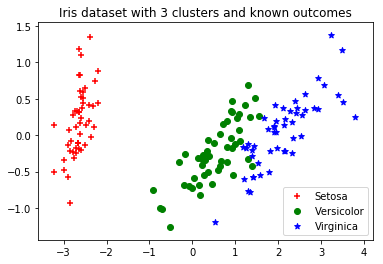

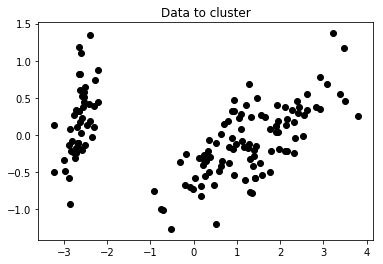

In [81]:
# use PCA to convert 4 features into 2 features for visualization
pca = PCA(n_components = 2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# visualize dataset
for i in range(0, pca_2d.shape[0]):
    if iris.target[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
    elif iris.target[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
    elif iris.target[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')
plt.legend([c1, c2, c3], ['Setosa', 'Versicolor', 'Virginica'])
plt.title('Iris dataset with 3 clusters and known outcomes')

plt.figure()
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = 'black')
plt.title('Data to cluster')
plt.show()

In [86]:
# K-means clustering
X = np.array(iris.data)
Y = np.array(iris.target)

# a cluster matrix [N, 3] to store which cluster each x belongs to
cluster = np.zeros([X.shape[0], 3])

# three centers for each cluster, randomly initialized
C0 = np.array([np.random.uniform(np.amin(X[:,0]), np.amax(X[:,0])), np.random.uniform(np.amin(X[:,1]), np.amax(X[:,1])), np.random.uniform(np.amin(X[:,2]), np.amax(X[:,2])), np.random.uniform(np.amin(X[:,3]), np.amax(X[:,3]))])
C1 = np.array([np.random.uniform(np.amin(X[:,0]), np.amax(X[:,0])), np.random.uniform(np.amin(X[:,1]), np.amax(X[:,1])), np.random.uniform(np.amin(X[:,2]), np.amax(X[:,2])), np.random.uniform(np.amin(X[:,3]), np.amax(X[:,3]))])
C2 = np.array([np.random.uniform(np.amin(X[:,0]), np.amax(X[:,0])), np.random.uniform(np.amin(X[:,1]), np.amax(X[:,1])), np.random.uniform(np.amin(X[:,2]), np.amax(X[:,2])), np.random.uniform(np.amin(X[:,3]), np.amax(X[:,3]))])

# define max iteration
maxIter = 50

print (X.shape)
print (Y.shape)
print (cluster.shape)
print (C0)
print (C1)
print (C2)

(150, 4)
(150,)
(150, 3)
[ 4.30183189  4.12422552  5.27941641  1.50064841]
[ 6.99693955  3.43195602  5.1174576   0.23744075]
[ 7.43458238  2.20143942  3.80292663  1.57077012]


In [87]:
for it in range(0, maxIter):
    # Step1: minimize J with respect to Rnk, keeping Uk fixed
    for n in range(0, X.shape[0]):
        x = X[n,:]
        # calculate the distance to each center
        dist_c0 = np.square(np.linalg.norm(x - C0))
        dist_c1 = np.square(np.linalg.norm(x - C1))
        dist_c2 = np.square(np.linalg.norm(x - C2))
        # erase old Rnk
        cluster[n,:] = [0,0,0]
        # update Rnk
        min_dist = min(dist_c0, dist_c1, dist_c2)
        if (dist_c0 == min_dist):
            cluster[n,0] = 1
        elif (dist_c1 == min_dist):
            cluster[n,1] = 1
        elif (dist_c2 == min_dist):
            cluster[n,2] = 1
    # Step2: minimize J with respect to Uk, keeping Rnk fixed
    sum_c0 = np.array([0,0,0,0], dtype = np.float64)
    sum_c1 = np.array([0,0,0,0], dtype = np.float64)
    sum_c2 = np.array([0,0,0,0], dtype = np.float64)
    for n in range(0, X.shape[0]):
        if (cluster[n,0] == 1):
            sum_c0 += X[n,:]
        elif (cluster[n,1] == 1):
            sum_c1 += X[n,:]
        elif (cluster[n,2] == 1):
            sum_c2 += X[n,:]
    new_C0 = sum_c0 / np.sum(cluster[:,0])
    new_C1 = sum_c1 / np.sum(cluster[:,1])
    new_C2 = sum_c2 / np.sum(cluster[:,2])
    
    if (np.sum(np.square(new_C0 - C0)) + np.sum(np.square(new_C1 - C1)) + np.sum(np.square(new_C2 - C2)) < 0.01):
        break
        
    C0 = new_C0
    C1 = new_C1
    C2 = new_C2
    
    print (it, ': ')
    print ('C0 = ', C0)
    print ('C1 = ', C1)
    print ('C2 = ', C2)
    print ('cluster[0] = ', cluster[0,:])

0 : 
C0 =  [ 5.68181818  2.91818182  4.89090909  1.9       ]
C1 =  [ 6.646  3.04   5.42   1.85 ]
C2 =  [ 5.41235955  3.07865169  2.68539326  0.74606742]
cluster[0] =  [ 0.  0.  1.]
1 : 
C0 =  [ 5.87826087  2.76521739  4.50869565  1.5       ]
C1 =  [ 6.81521739  3.05434783  5.55434783  1.95869565]
C2 =  [ 5.04482759  3.28275862  1.73965517  0.35689655]
cluster[0] =  [ 0.  0.  1.]
2 : 
C0 =  [ 5.89666667  2.745       4.41166667  1.44      ]
C1 =  [ 6.85384615  3.07692308  5.71538462  2.05384615]
C2 =  [ 5.00784314  3.4         1.49411765  0.26078431]
cluster[0] =  [ 0.  0.  1.]


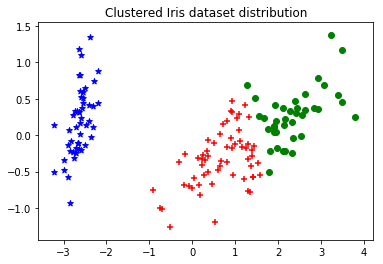

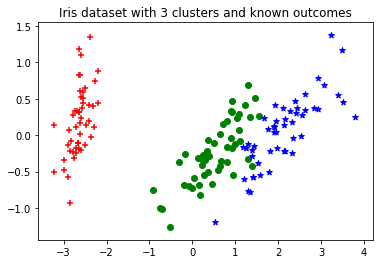

In [88]:
# visualize clustered dataset
for i in range(0, pca_2d.shape[0]):
    if cluster[i,0] == 1:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
    elif cluster[i,1] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
    elif cluster[i,2] == 1:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')
plt.title('Clustered Iris dataset distribution')

plt.figure()
# visualize original dataset
for i in range(0, pca_2d.shape[0]):
    if iris.target[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
    elif iris.target[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
    elif iris.target[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')
plt.title('Iris dataset with 3 clusters and known outcomes')
plt.show()

# Note: color doesn't matter, it just means a cluster, so even the color of clusters are different, but the results are good

In [89]:
# get data for each cluster
x_cluster0 = np.empty([0,4])
x_cluster1 = np.empty([0,4])
x_cluster2 = np.empty([0,4])
for n in range(0, X.shape[0]):
    if (cluster[n,0] == 1):
        x_cluster0 = np.append(x_cluster0, np.reshape(X[n,:],(1,4)), axis = 0)
    elif (cluster[n,1] == 1):
        x_cluster1 = np.append(x_cluster1, np.reshape(X[n,:],(1,4)), axis = 0)
    elif (cluster[n,2] == 1):
        x_cluster2 = np.append(x_cluster2, np.reshape(X[n,:],(1,4)), axis = 0)

labels = np.zeros([X.shape[0]], dtype = np.uint8)

data = {'x0': X[:,0], 'x1': X[:,1], 'x2': X[:,2], 'x3': X[:,3], 'labels': labels}
df = pd.DataFrame(data = data)

print(df.head())
print(df.tail())

# E-M Algorithm
# centers of k-means clustering are used as initial parameters for EM algorithm
mu = []
mu.append(C0)
mu.append(C1)
mu.append(C2)

# initial covariance matrix
cov = []
cov.append(np.cov(x_cluster0.T))
cov.append(np.cov(x_cluster1.T))
cov.append(np.cov(x_cluster2.T))

# mixing coefficients
# after k-means clustering, there are 39 points assigned to first class, 61 points assigned to second class, so the percentage is used to initialize the mixing coefficients
mix_coef = np.array([0.26, 0.4, 0.34])

   labels   x0   x1   x2   x3
0       0  5.1  3.5  1.4  0.2
1       0  4.9  3.0  1.4  0.2
2       0  4.7  3.2  1.3  0.2
3       0  4.6  3.1  1.5  0.2
4       0  5.0  3.6  1.4  0.2
     labels   x0   x1   x2   x3
145       0  6.7  3.0  5.2  2.3
146       0  6.3  2.5  5.0  1.9
147       0  6.5  3.0  5.2  2.0
148       0  6.2  3.4  5.4  2.3
149       0  5.9  3.0  5.1  1.8


In [90]:
# calculate responsibility matrix (N * K)
def res(X, mu, cov, mix_coef):
    resMatrix = np.empty([X.shape[0], 3])
    for n in range(0, X.shape[0]):
        denomitor = 0.0
        for k in range(0, 3):
            denomitor += mix_coef[k] * multivariate_normal.pdf(X[n,:], mean = mu[k], cov = cov[k])
        for k in range(0, 3):
            resMatrix[n,k] = mix_coef[k] * multivariate_normal.pdf(X[n,:], mean = mu[k], cov = cov[k]) / denomitor
    return resMatrix

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


iter:  0


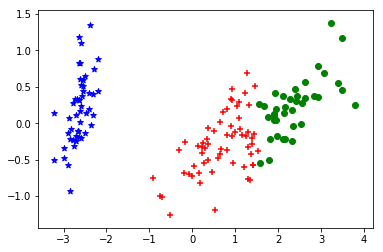

iter:  1


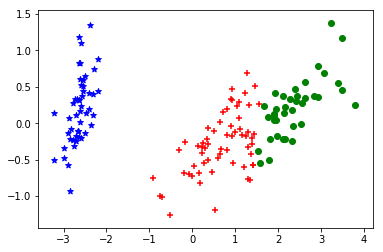

iter:  2


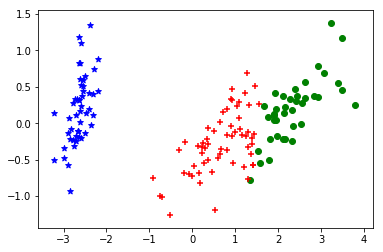

iter:  3


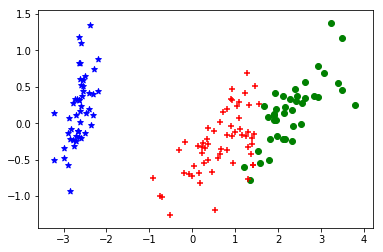

iter:  4


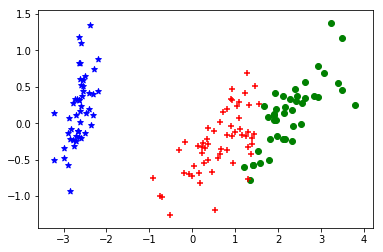

iter:  5


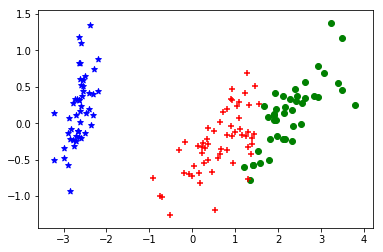

Done!


In [91]:
for iters in range(0, maxIter):
    # E-step
    # calculate responsibility matrix
    resMatrix = res(X, mu, cov, mix_coef)
    # update labels
    for n in range(X.shape[0]):
        maxProb = max(resMatrix[n][0], resMatrix[n][1], resMatrix[n][2])
        
        if (resMatrix[n][0] == maxProb):
            df['labels'][n] = 0
        elif (resMatrix[n][1] == maxProb):
            df['labels'][n] = 1
        elif (resMatrix[n][2] == maxProb):
            df['labels'][n] = 2
            
    # M-step
    new_mu = []
    new_cov = []
    
    points_assigned_to_cluster0 = df[df['labels'] == 0]
    points_assigned_to_cluster1 = df[df['labels'] == 1]
    points_assigned_to_cluster2 = df[df['labels'] == 2]
    
    percent_assigned_to_cluster0 = len(points_assigned_to_cluster0)/float(len(df))
    percent_assigned_to_cluster1 = len(points_assigned_to_cluster1)/float(len(df))
    percent_assigned_to_cluster2 = len(points_assigned_to_cluster2)/float(len(df))

    # calculate mix coef
    new_mix_coef = np.array([percent_assigned_to_cluster0, percent_assigned_to_cluster1, percent_assigned_to_cluster2])
 
    # calculate mean
    new_mu.append(np.array([points_assigned_to_cluster0['x0'].mean(), points_assigned_to_cluster0['x1'].mean(), points_assigned_to_cluster0['x2'].mean(), points_assigned_to_cluster0['x3'].mean()]))
    new_mu.append(np.array([points_assigned_to_cluster1['x0'].mean(), points_assigned_to_cluster1['x1'].mean(), points_assigned_to_cluster1['x2'].mean(), points_assigned_to_cluster1['x3'].mean()]))
    new_mu.append(np.array([points_assigned_to_cluster2['x0'].mean(), points_assigned_to_cluster2['x1'].mean(), points_assigned_to_cluster2['x2'].mean(), points_assigned_to_cluster2['x3'].mean()]))

    # calculate covariance matrix
    for k in range(0, 3):
        x_cluster0 = np.empty([0,4])
        x_cluster1 = np.empty([0,4])
        x_cluster2 = np.empty([0,4])
        for n in range(0, X.shape[0]):
            if df['labels'][n] == 0:
                x_cluster0 = np.append(x_cluster0, np.reshape(X[n,:],(1,4)), axis = 0)
            elif df['labels'][n] == 1:
                x_cluster1 = np.append(x_cluster1, np.reshape(X[n,:],(1,4)), axis = 0)
            elif df['labels'][n] == 2:
                x_cluster2 = np.append(x_cluster2, np.reshape(X[n,:],(1,4)), axis = 0)
    new_cov.append(np.cov(x_cluster0.T))
    new_cov.append(np.cov(x_cluster1.T))
    new_cov.append(np.cov(x_cluster2.T))
#     new_sigma0 = np.array([[points_assigned_to_cluster0['x0'].std(),0,0,0],[0,points_assigned_to_cluster0['x1'].std(),0,0],[0,0,points_assigned_to_cluster0['x2'].std(),0],[0,0,0,points_assigned_to_cluster0['x3'].std()]])
#     new_sigma1 = np.array([[points_assigned_to_cluster1['x0'].std(),0,0,0],[0,points_assigned_to_cluster1['x1'].std(),0,0],[0,0,points_assigned_to_cluster1['x2'].std(),0],[0,0,0,points_assigned_to_cluster1['x3'].std()]])
#     new_sigma2 = np.array([[points_assigned_to_cluster2['x0'].std(),0,0,0],[0,points_assigned_to_cluster2['x1'].std(),0,0],[0,0,points_assigned_to_cluster2['x2'].std(),0],[0,0,0,points_assigned_to_cluster2['x3'].std()]])
    
    # check convergence
    convg = np.sqrt(np.square(np.linalg.norm(new_mu[0] - mu[0])) + np.square(np.linalg.norm(new_mu[1] - mu[1])) + np.square(np.linalg.norm(new_mu[2] - mu[2])))
    
    # update parameter
    mix_coef = new_mix_coef
    mu = new_mu
    cov = new_cov

    # visulize clustering each iteration
    print('iter: ', iters)
    plt.figure()
    for i in range(0, pca_2d.shape[0]):
        if df['labels'][i] == 0:
            plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
        elif df['labels'][i] == 1:
            plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
        elif df['labels'][i] == 2:
            plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')
    plt.show()
    
    if convg < 0.001:
        break
print('Done!')